<a href="https://colab.research.google.com/github/darrencc1/bike-rental-predictions/blob/main/Bike_Rental_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#FINAL MODEL

## Underneath this block of code is some basic exploration and graphs of this model tested with different random seeds.
## Actual exploration of the data set, is in a different colab ##

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models

### Call backs is something called at a point in time of the training of an epoch.
### ReduceLROnPlateau automatically reduces the learning rate during training potentially helping wityh convergence
### Has monitor, patience, factor, min_lr, verbose
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load and preprocess data
# Ensure datetime is used properly so the
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes['total_rentals'] = bikes['casual'] + bikes['registered']
bikes['dteday'] = pd.to_datetime(bikes['dteday'])
bikes['month'] = bikes['dteday'].dt.month
bikes['day'] = bikes['dteday'].dt.day
bikes['year'] = bikes['dteday'].dt.year
bikes['weekday'] = bikes['dteday'].dt.weekday
bikes.drop('dteday', axis=1, inplace=True)
bikes.drop(['casual', 'registered'], axis=1, inplace=True)

####GOAL: Predict Novemeber and December Bike Rentals ####

# Filter data for November and December
bikes_nd = bikes[bikes['month'].isin([11, 12])]

# Separate features and target variable ensuring target is NOT in training
X = bikes_nd.drop('total_rentals', axis=1)
y = bikes_nd['total_rentals']

# Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, testing, and validation sets

## This first split is 80% for training and 20% for the rest.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=33)
## This 2nd split takes the 20% test, and splits it in half (.5) meaning test and val are now 10% each.
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=33)

# Neural Network, Spent some time testing a differnt number of dense layers.
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

# This Compiles the model using mean squared error as metric.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Define the ReduceLROnPlateau callback
# the min_lr is something that can be tested more.
# patience of 5 allows for natural learning before we change the learning by a factor of .1
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)

# Train the model with the learning rate scheduler
# This number of epochs is not needed. When you look at the chart I created you can see that 40-50 epochs is about all you need.
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, verbose=1, callbacks=[reduce_lr])

# Evaluate the model
train_loss, train_mse = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Making predictions
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)

# Calculate Mean Absolute Error
train_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, y_pred_test)
val_mae = mean_absolute_error(y_val, y_pred_val)

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Validation MAE: {val_mae}")

# Display the first 5 predictions for the test set
print("First 5 predictions for the test set:")
print(y_pred_test[:5])

# Display the first 5 predictions for the validation set
print("First 5 predictions for the validation set:")
print(y_pred_val[:5])

# Get the R^2 score
r2_test = r2_score(y_test, y_pred_test)
r2_val = r2_score(y_val, y_pred_val)
# print(f"Test R^2 Score: {r2_test}")
# print(f"Validation R^2 Score: {r2_val}")

# Display the first few rows of the validation and test data
print("First few rows of the validation data:")
print(pd.DataFrame(X_val, columns=X.columns).head())
print(pd.DataFrame(y_val).head())

print("First few rows of the test data:")
print(pd.DataFrame(X_test, columns=X.columns).head())
print(pd.DataFrame(y_test).head())

Epoch 1/150
440/440 [==============================] - 15s 17ms/step - loss: 48662.9844 - mean_squared_error: 48662.9844 - val_loss: 31831.4102 - val_mean_squared_error: 31831.4102 - lr: 0.0010
Epoch 2/150
440/440 [==============================] - 4s 9ms/step - loss: 26852.5918 - mean_squared_error: 26852.5918 - val_loss: 22586.8125 - val_mean_squared_error: 22586.8125 - lr: 0.0010
Epoch 3/150
440/440 [==============================] - 3s 7ms/step - loss: 21358.3672 - mean_squared_error: 21358.3672 - val_loss: 19756.8770 - val_mean_squared_error: 19756.8770 - lr: 0.0010
Epoch 4/150
440/440 [==============================] - 5s 11ms/step - loss: 18508.8301 - mean_squared_error: 18508.8301 - val_loss: 17336.8535 - val_mean_squared_error: 17336.8535 - lr: 0.0010
Epoch 5/150
440/440 [==============================] - 5s 12ms/step - loss: 15224.2637 - mean_squared_error: 15224.2637 - val_loss: 12287.1523 - val_mean_squared_error: 12287.1523 - lr: 0.0010
Epoch 6/150
440/440 [===============

In [ ]:
print(f"Test R^2 Score: {r2_test}")
print(f"Validation R^2 Score: {r2_val}")

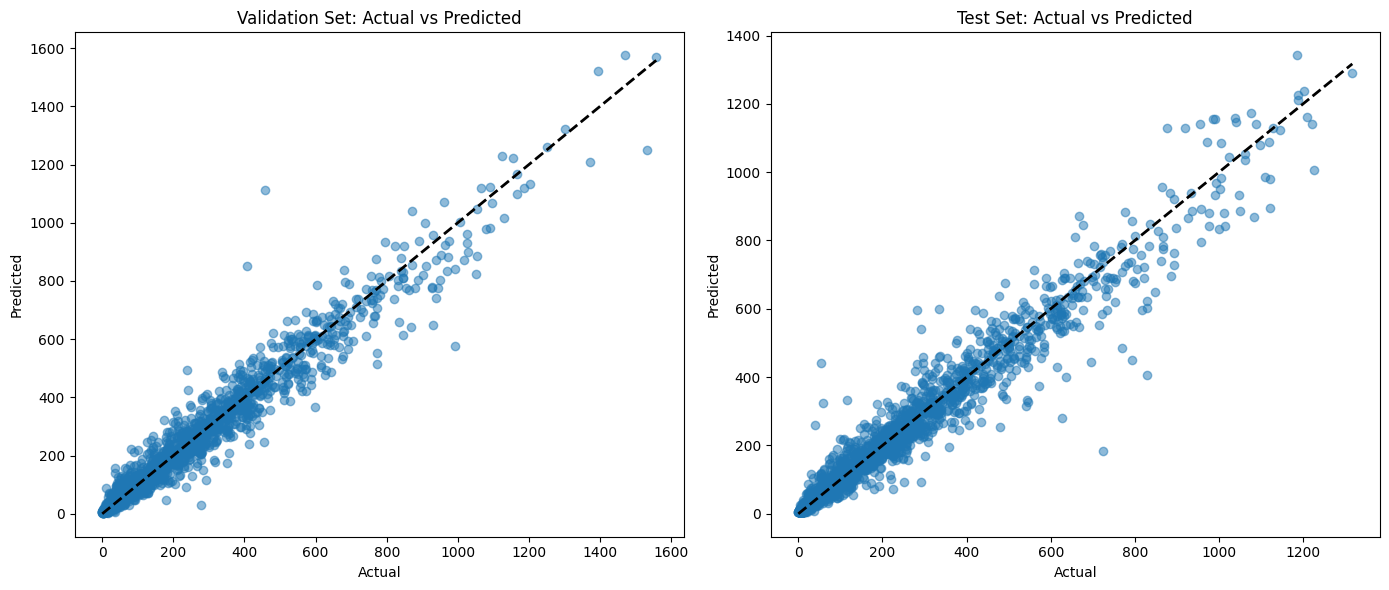

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Validation Set: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

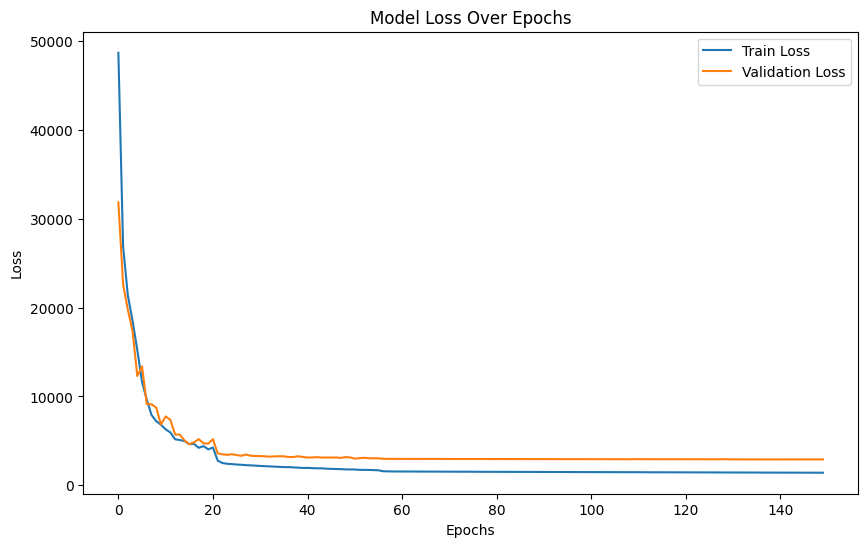

In [ ]:
# Plot loss during training (we can do this because we saved a "history" during training)
from matplotlib import pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Random State to 41
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load and preprocess data
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes['total_rentals'] = bikes['casual'] + bikes['registered']
bikes['dteday'] = pd.to_datetime(bikes['dteday'])
bikes['month'] = bikes['dteday'].dt.month
bikes['day'] = bikes['dteday'].dt.day
bikes['year'] = bikes['dteday'].dt.year
bikes['weekday'] = bikes['dteday'].dt.weekday
bikes.drop('dteday', axis=1, inplace=True)
bikes.drop(['casual', 'registered'], axis=1, inplace=True)

# Filter data for November and December
bikes_nd = bikes[bikes['month'].isin([11, 12])]

# Separate features and target variable
X = bikes_nd.drop('total_rentals', axis=1)
y = bikes_nd['total_rentals']

# Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=41)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=41)

# Build the neural network
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)

# Train the model with the learning rate scheduler
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, verbose=1, callbacks=[reduce_lr])

# Evaluate the model
train_loss, train_mse = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Making predictions
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)

# Calculate Mean Absolute Error
# train_mae = mean_absolute_error(y_train, model.predict(X_train))
# test_mae = mean_absolute_error(y_test, y_pred_test)
# val_mae = mean_absolute_error(y_val, y_pred_val)

# print(f"Train MAE: {train_mae}")
# print(f"Test MAE: {test_mae}")
# print(f"Validation MAE: {val_mae}")

# Display the first 5 predictions for the test set
print("First 5 predictions for the test set:")
print(y_pred_test[:5])

# Display the first 5 predictions for the validation set
print("First 5 predictions for the validation set:")
print(y_pred_val[:5])

# Get the R^2 score
r2_test = r2_score(y_test, y_pred_test)
r2_val = r2_score(y_val, y_pred_val)
print(f"Test R^2 Score: {r2_test}")
print(f"Validation R^2 Score: {r2_val}")

# Display the first few rows of the validation and test data
print("First few rows of the validation data:")
print(pd.DataFrame(X_val, columns=X.columns).head())
print(pd.DataFrame(y_val).head())

print("First few rows of the test data:")
print(pd.DataFrame(X_test, columns=X.columns).head())
print(pd.DataFrame(y_test).head())

Epoch 1/150
440/440 [==============================] - 3s 4ms/step - loss: 47866.8750 - mean_squared_error: 47866.8750 - val_loss: 28469.1152 - val_mean_squared_error: 28469.1152 - lr: 0.0010
Epoch 2/150
440/440 [==============================] - 1s 3ms/step - loss: 25535.6934 - mean_squared_error: 25535.6934 - val_loss: 19574.8027 - val_mean_squared_error: 19574.8027 - lr: 0.0010
Epoch 3/150
440/440 [==============================] - 2s 4ms/step - loss: 20538.5312 - mean_squared_error: 20538.5312 - val_loss: 17857.4668 - val_mean_squared_error: 17857.4668 - lr: 0.0010
Epoch 4/150
440/440 [==============================] - 1s 3ms/step - loss: 17660.3711 - mean_squared_error: 17660.3711 - val_loss: 15634.7451 - val_mean_squared_error: 15634.7451 - lr: 0.0010
Epoch 5/150
440/440 [==============================] - 2s 5ms/step - loss: 14515.6143 - mean_squared_error: 14515.6143 - val_loss: 11704.2451 - val_mean_squared_error: 11704.2451 - lr: 0.0010
Epoch 6/150
440/440 [===================

In [ ]:
train_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, y_pred_test)
val_mae = mean_absolute_error(y_val, y_pred_val)

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Validation MAE: {val_mae}")

r2_test = r2_score(y_test, y_pred_test)
r2_val = r2_score(y_val, y_pred_val)
print(f"Test R^2 Score: {r2_test}")
print(f"Validation R^2 Score: {r2_val}")

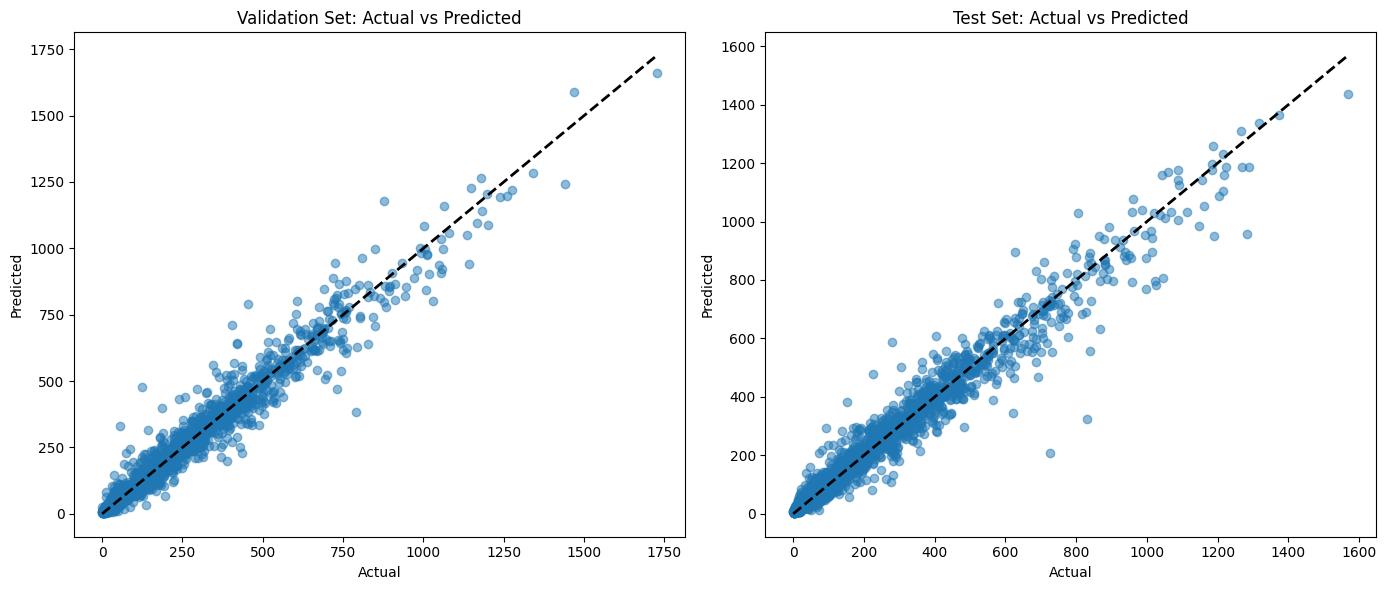

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Validation Set: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

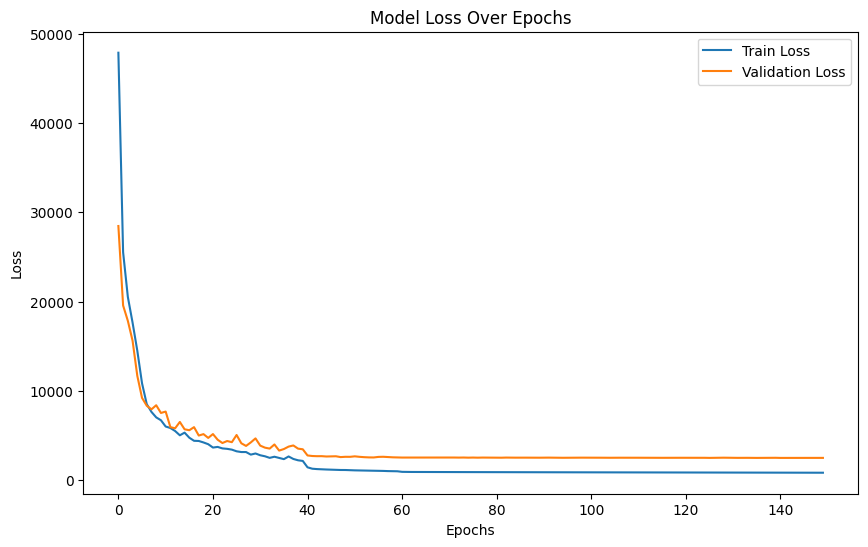

In [ ]:
# Plot loss during training (we can do this because we saved a "history" during training)
from matplotlib import pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Random State to 77
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load and preprocess data
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes['total_rentals'] = bikes['casual'] + bikes['registered']
bikes['dteday'] = pd.to_datetime(bikes['dteday'])
bikes['month'] = bikes['dteday'].dt.month
bikes['day'] = bikes['dteday'].dt.day
bikes['year'] = bikes['dteday'].dt.year
bikes['weekday'] = bikes['dteday'].dt.weekday
bikes.drop('dteday', axis=1, inplace=True)
bikes.drop(['casual', 'registered'], axis=1, inplace=True)

# Filter data for November and December
bikes_nd = bikes[bikes['month'].isin([11, 12])]

# Separate features and target variable
X = bikes_nd.drop('total_rentals', axis=1)
y = bikes_nd['total_rentals']

# Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=77)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=77)

# Build the neural network
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)

# Train the model with the learning rate scheduler
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, verbose=1, callbacks=[reduce_lr])

# Evaluate the model
train_loss, train_mse = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Making predictions
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)

# Calculate Mean Absolute Error
# train_mae = mean_absolute_error(y_train, model.predict(X_train))
# test_mae = mean_absolute_error(y_test, y_pred_test)
# val_mae = mean_absolute_error(y_val, y_pred_val)

# print(f"Train MAE: {train_mae}")
# print(f"Test MAE: {test_mae}")
# print(f"Validation MAE: {val_mae}")

# Display the first 5 predictions for the test set
print("First 5 predictions for the test set:")
print(y_pred_test[:5])

# Display the first 5 predictions for the validation set
print("First 5 predictions for the validation set:")
print(y_pred_val[:5])

# Get the R^2 score
# r2_test = r2_score(y_test, y_pred_test)
# r2_val = r2_score(y_val, y_pred_val)
# print(f"Test R^2 Score: {r2_test}")
# print(f"Validation R^2 Score: {r2_val}")

# Display the first few rows of the validation and test data
print("First few rows of the validation data:")
print(pd.DataFrame(X_val, columns=X.columns).head())
print(pd.DataFrame(y_val).head())

print("First few rows of the test data:")
print(pd.DataFrame(X_test, columns=X.columns).head())
print(pd.DataFrame(y_test).head())

Epoch 1/150
440/440 [==============================] - 3s 4ms/step - loss: 47289.2461 - mean_squared_error: 47289.2461 - val_loss: 39184.5312 - val_mean_squared_error: 39184.5312 - lr: 0.0010
Epoch 2/150
440/440 [==============================] - 2s 4ms/step - loss: 26953.4297 - mean_squared_error: 26953.4297 - val_loss: 25237.4531 - val_mean_squared_error: 25237.4531 - lr: 0.0010
Epoch 3/150
440/440 [==============================] - 2s 4ms/step - loss: 21076.9414 - mean_squared_error: 21076.9414 - val_loss: 20817.3750 - val_mean_squared_error: 20817.3750 - lr: 0.0010
Epoch 4/150
440/440 [==============================] - 2s 4ms/step - loss: 18227.1113 - mean_squared_error: 18227.1113 - val_loss: 23414.8047 - val_mean_squared_error: 23414.8047 - lr: 0.0010
Epoch 5/150
440/440 [==============================] - 2s 4ms/step - loss: 15178.5869 - mean_squared_error: 15178.5869 - val_loss: 13609.0029 - val_mean_squared_error: 13609.0029 - lr: 0.0010
Epoch 6/150
440/440 [===================

In [ ]:
train_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, y_pred_test)
val_mae = mean_absolute_error(y_val, y_pred_val)

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Validation MAE: {val_mae}")

r2_test = r2_score(y_test, y_pred_test)
r2_val = r2_score(y_val, y_pred_val)
print(f"Test R^2 Score: {r2_test}")
print(f"Validation R^2 Score: {r2_val}")

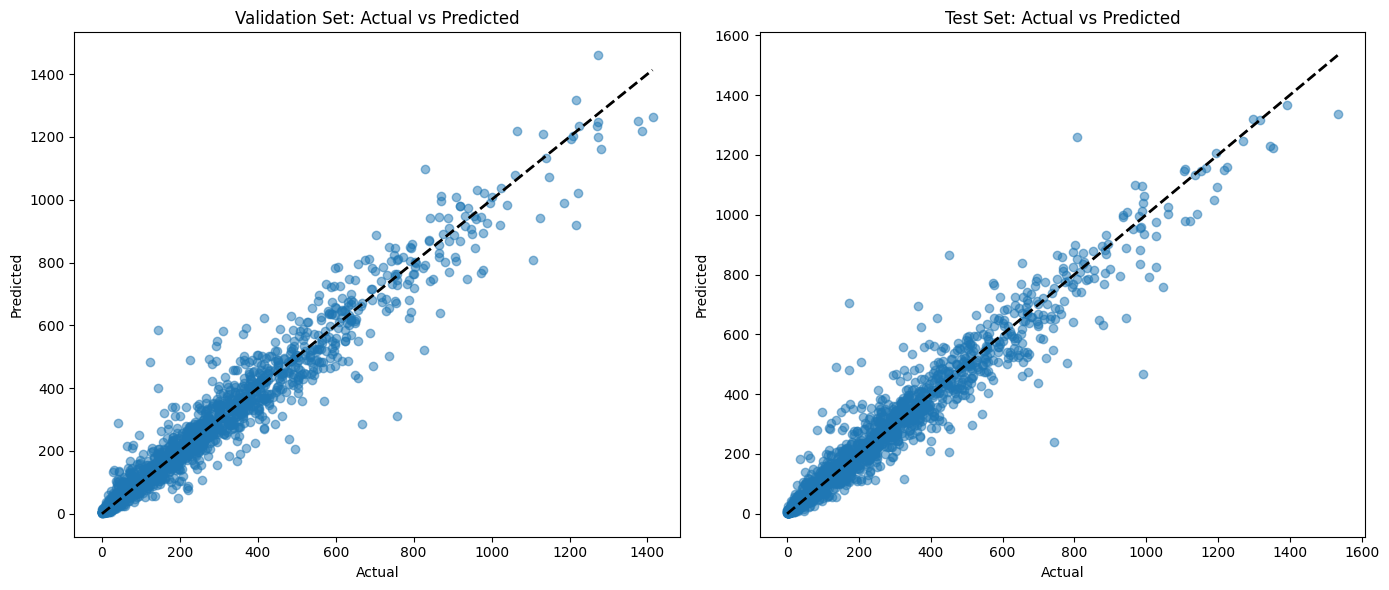

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Validation Set: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

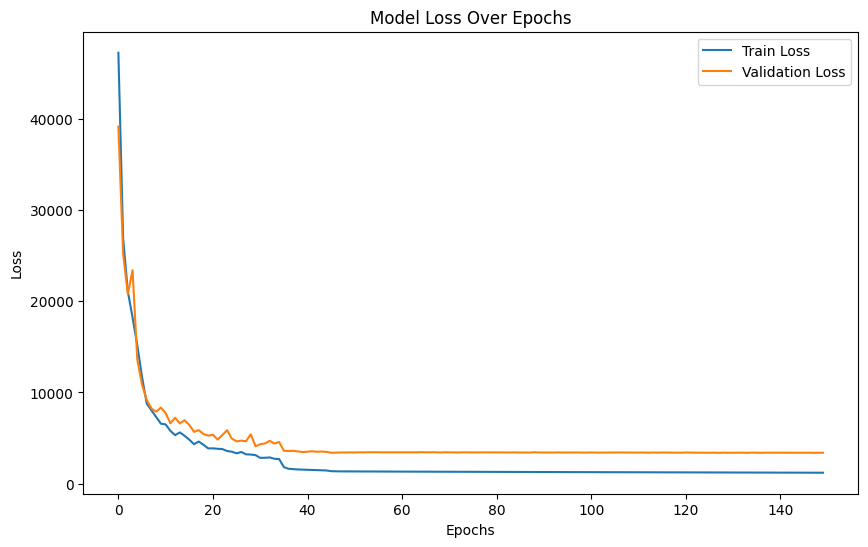

In [ ]:
# Plot loss during training (we can do this because we saved a "history" during training)
from matplotlib import pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#All columns used comparison.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load and preprocess data
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes['total_rentals'] = bikes['casual'] + bikes['registered']
bikes['dteday'] = pd.to_datetime(bikes['dteday'])
bikes['month'] = bikes['dteday'].dt.month
bikes['day'] = bikes['dteday'].dt.day
bikes['year'] = bikes['dteday'].dt.year
bikes['weekday'] = bikes['dteday'].dt.weekday
bikes.drop('dteday', axis=1, inplace=True)
bikes.drop(['casual', 'registered'], axis=1, inplace=True)

# Filter data for November and December


# Separate features and target variable
X = bikes.drop('total_rentals', axis=1)
y = bikes['total_rentals']

# Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=33)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=33)

# Build the neural network
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)

# Train the model with the learning rate scheduler
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, verbose=1, callbacks=[reduce_lr])

# Evaluate the model
train_loss, train_mse = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Making predictions
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)

# Calculate Mean Absolute Error
train_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, y_pred_test)
val_mae = mean_absolute_error(y_val, y_pred_val)

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Validation MAE: {val_mae}")

# Display the first 5 predictions for the test set
print("First 5 predictions for the test set:")
print(y_pred_test[:5])

# Display the first 5 predictions for the validation set
print("First 5 predictions for the validation set:")
print(y_pred_val[:5])

# Get the R^2 score
r2_test = r2_score(y_test, y_pred_test)
r2_val = r2_score(y_val, y_pred_val)
print(f"Test R^2 Score: {r2_test}")
print(f"Validation R^2 Score: {r2_val}")

# Display the first few rows of the validation and test data
print("First few rows of the validation data:")
print(pd.DataFrame(X_val, columns=X.columns).head())
print(pd.DataFrame(y_val).head())

print("First few rows of the test data:")
print(pd.DataFrame(X_test, columns=X.columns).head())
print(pd.DataFrame(y_test).head())

Epoch 1/150
2812/2812 [==============================] - 13s 4ms/step - loss: 44703.3398 - mean_squared_error: 44703.3398 - val_loss: 21154.1602 - val_mean_squared_error: 21154.1602 - lr: 0.0010
Epoch 2/150
2812/2812 [==============================] - 11s 4ms/step - loss: 14118.3857 - mean_squared_error: 14118.3857 - val_loss: 10852.9277 - val_mean_squared_error: 10852.9277 - lr: 0.0010
Epoch 3/150
2812/2812 [==============================] - 11s 4ms/step - loss: 10099.5586 - mean_squared_error: 10099.5586 - val_loss: 8921.1406 - val_mean_squared_error: 8921.1406 - lr: 0.0010
Epoch 4/150
2812/2812 [==============================] - 9s 3ms/step - loss: 8669.9307 - mean_squared_error: 8669.9307 - val_loss: 11605.6836 - val_mean_squared_error: 11605.6836 - lr: 0.0010
Epoch 5/150
2812/2812 [==============================] - 11s 4ms/step - loss: 8139.2808 - mean_squared_error: 8139.2808 - val_loss: 8402.6182 - val_mean_squared_error: 8402.6182 - lr: 0.0010
Epoch 6/150
2812/2812 [===========

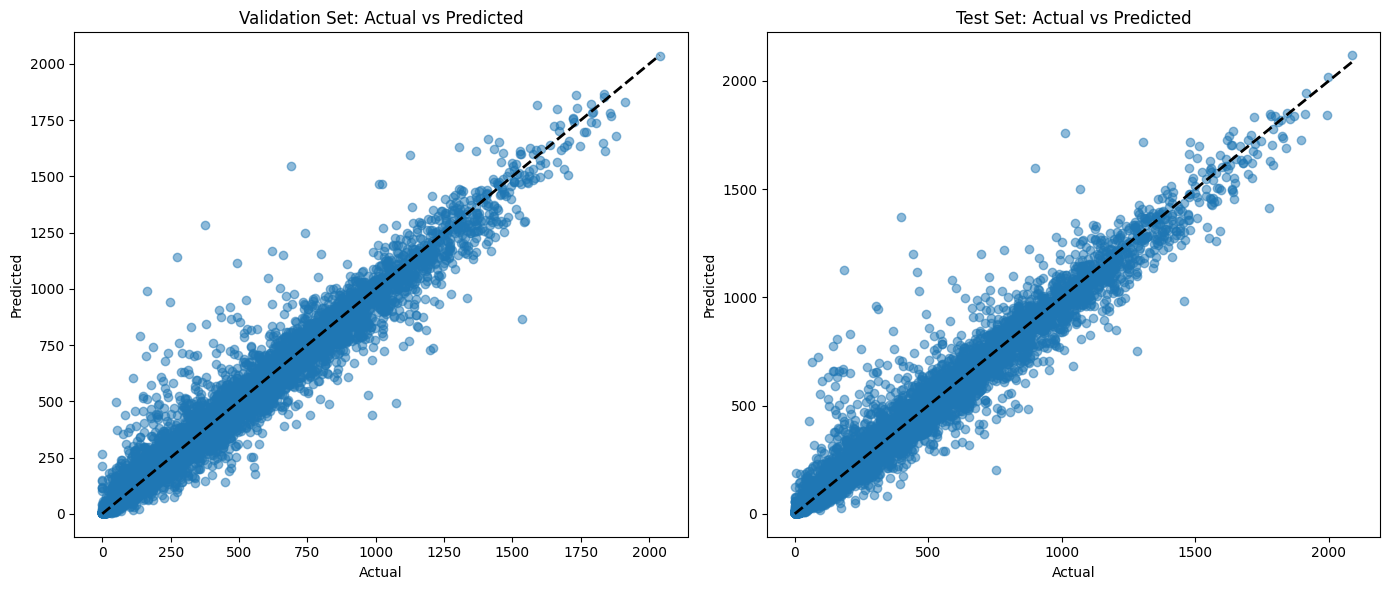

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Validation Set: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

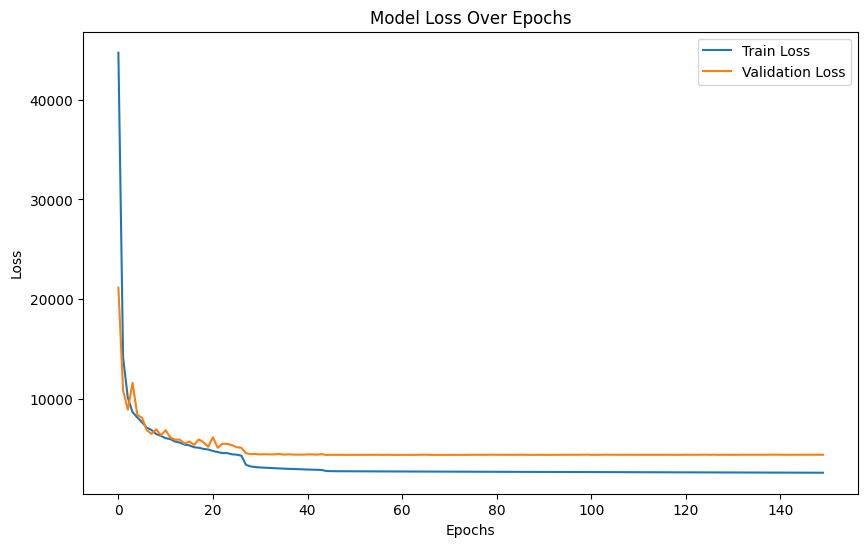

In [ ]:
# Plot loss during training (we can do this because we saved a "history" during training)
from matplotlib import pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Filter the original data for November and December
nov_dec_indices = bikes[(bikes['month'] == 11) | (bikes['month'] == 12)].index

# Get indices for November and December in the test and validation sets
nov_dec_val_indices = [i for i in range(len(X_val)) if i in nov_dec_indices]
nov_dec_test_indices = [i for i in range(len(X_test)) if i in nov_dec_indices]

# Filter validation and test sets for November and December
X_val_nov_dec = X_val[nov_dec_val_indices]
y_val_nov_dec = y_val.iloc[nov_dec_val_indices]
y_pred_val_nov_dec = y_pred_val[nov_dec_val_indices]

X_test_nov_dec = X_test[nov_dec_test_indices]
y_test_nov_dec = y_test.iloc[nov_dec_test_indices]
y_pred_test_nov_dec = y_pred_test[nov_dec_test_indices]

# Calculate metrics for November and December validation and test sets
val_mae_nov_dec = mean_absolute_error(y_val_nov_dec, y_pred_val_nov_dec)
test_mae_nov_dec = mean_absolute_error(y_test_nov_dec, y_pred_test_nov_dec)
val_mse_nov_dec = mean_squared_error(y_val_nov_dec, y_pred_val_nov_dec)
test_mse_nov_dec = mean_squared_error(y_test_nov_dec, y_pred_test_nov_dec)
val_r2_nov_dec = r2_score(y_val_nov_dec, y_pred_val_nov_dec)
test_r2_nov_dec = r2_score(y_test_nov_dec, y_pred_test_nov_dec)

print(f"November and December Validation MAE: {val_mae_nov_dec}")
print(f"November and December Test MAE: {test_mae_nov_dec}")
print(f"November and December Validation MSE: {val_mse_nov_dec}")
print(f"November and December Test MSE: {test_mse_nov_dec}")
print(f"November and December Validation R^2: {val_r2_nov_dec}")
print(f"November and December Test R^2: {test_r2_nov_dec}")


November and December Validation MAE: 37.86895777097817
November and December Test MAE: 36.886608291519146
November and December Validation MSE: 4903.699764038867
November and December Test MSE: 4252.416580578482
November and December Validation R^2: 0.958810370326333
November and December Test R^2: 0.9648014614316924


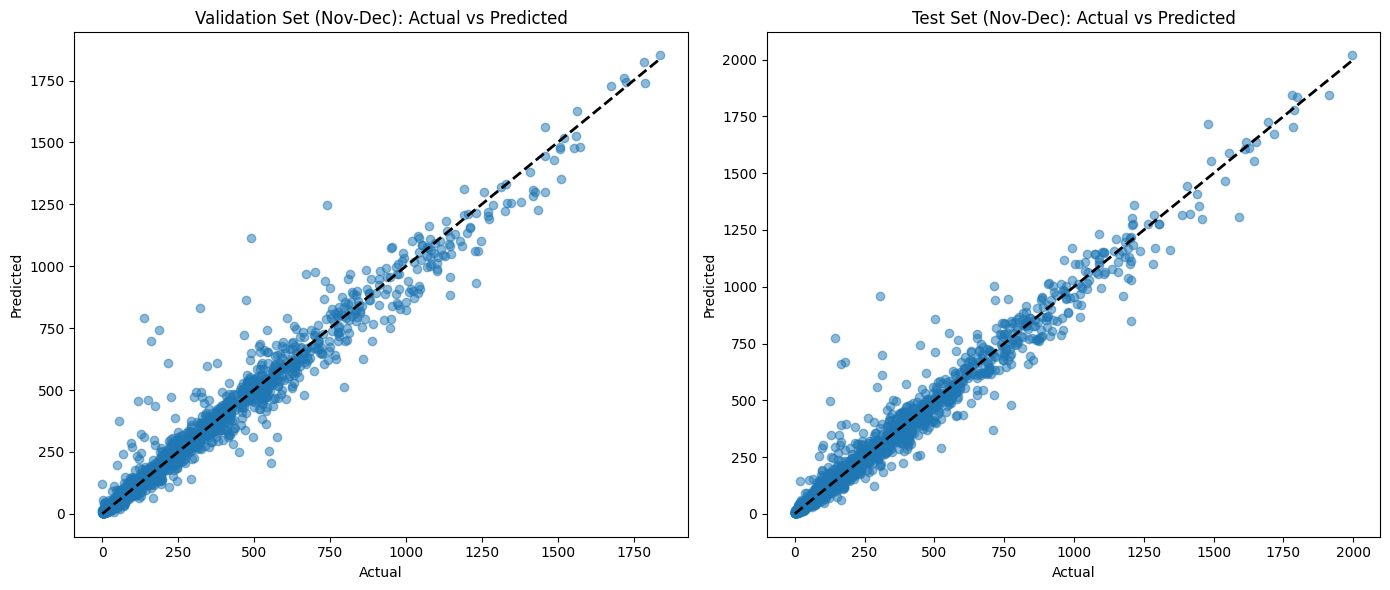

In [ ]:
# Plot the actual vs predicted for November and December
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_val_nov_dec, y_pred_val_nov_dec, alpha=0.5)
plt.plot([y_val_nov_dec.min(), y_val_nov_dec.max()], [y_val_nov_dec.min(), y_val_nov_dec.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Validation Set (Nov-Dec): Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test_nov_dec, y_pred_test_nov_dec, alpha=0.5)
plt.plot([y_test_nov_dec.min(), y_test_nov_dec.max()], [y_test_nov_dec.min(), y_test_nov_dec.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set (Nov-Dec): Actual vs Predicted')

plt.tight_layout()
plt.show()

In [ ]:
#All columns used comparison.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load and preprocess data
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes['total_rentals'] = bikes['casual'] + bikes['registered']
bikes['dteday'] = pd.to_datetime(bikes['dteday'])
bikes['month'] = bikes['dteday'].dt.month
bikes['day'] = bikes['dteday'].dt.day
bikes['year'] = bikes['dteday'].dt.year
bikes['weekday'] = bikes['dteday'].dt.weekday
bikes.drop('dteday', axis=1, inplace=True)
bikes.drop(['casual', 'registered'], axis=1, inplace=True)

# Filter data for November and December


# Separate features and target variable
X = bikes.drop('total_rentals', axis=1)
y = bikes['total_rentals']

# Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=41)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=41)

# Build the neural network
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)

# Train the model with the learning rate scheduler
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=75, verbose=1, callbacks=[reduce_lr])

# Evaluate the model
train_loss, train_mse = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Making predictions
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)

# Calculate Mean Absolute Error
train_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, y_pred_test)
val_mae = mean_absolute_error(y_val, y_pred_val)

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Validation MAE: {val_mae}")

# Display the first 5 predictions for the test set
print("First 5 predictions for the test set:")
print(y_pred_test[:5])

# Display the first 5 predictions for the validation set
print("First 5 predictions for the validation set:")
print(y_pred_val[:5])

# Get the R^2 score
r2_test = r2_score(y_test, y_pred_test)
r2_val = r2_score(y_val, y_pred_val)
print(f"Test R^2 Score: {r2_test}")
print(f"Validation R^2 Score: {r2_val}")

# Display the first few rows of the validation and test data
print("First few rows of the validation data:")
print(pd.DataFrame(X_val, columns=X.columns).head())
print(pd.DataFrame(y_val).head())

print("First few rows of the test data:")
print(pd.DataFrame(X_test, columns=X.columns).head())
print(pd.DataFrame(y_test).head())

Epoch 1/75
2812/2812 [==============================] - 11s 3ms/step - loss: 44624.1172 - mean_squared_error: 44624.1172 - val_loss: 21604.0918 - val_mean_squared_error: 21604.0918 - lr: 0.0010
Epoch 2/75
2812/2812 [==============================] - 8s 3ms/step - loss: 15680.6973 - mean_squared_error: 15680.6973 - val_loss: 12037.5322 - val_mean_squared_error: 12037.5322 - lr: 0.0010
Epoch 3/75
2812/2812 [==============================] - 9s 3ms/step - loss: 10198.5518 - mean_squared_error: 10198.5518 - val_loss: 10141.7607 - val_mean_squared_error: 10141.7607 - lr: 0.0010
Epoch 4/75
2812/2812 [==============================] - 10s 3ms/step - loss: 8768.0322 - mean_squared_error: 8768.0322 - val_loss: 7388.8369 - val_mean_squared_error: 7388.8369 - lr: 0.0010
Epoch 5/75
2812/2812 [==============================] - 8s 3ms/step - loss: 7971.4082 - mean_squared_error: 7971.4082 - val_loss: 7499.1562 - val_mean_squared_error: 7499.1562 - lr: 0.0010
Epoch 6/75
2812/2812 [===================

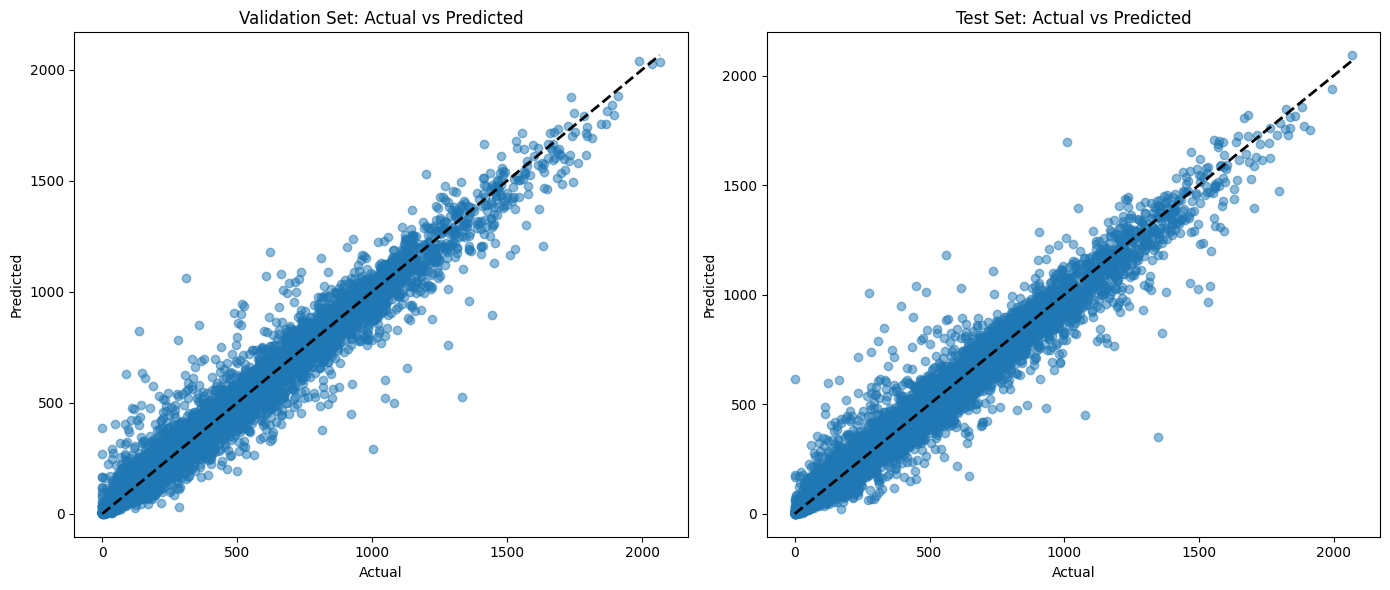

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Validation Set: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

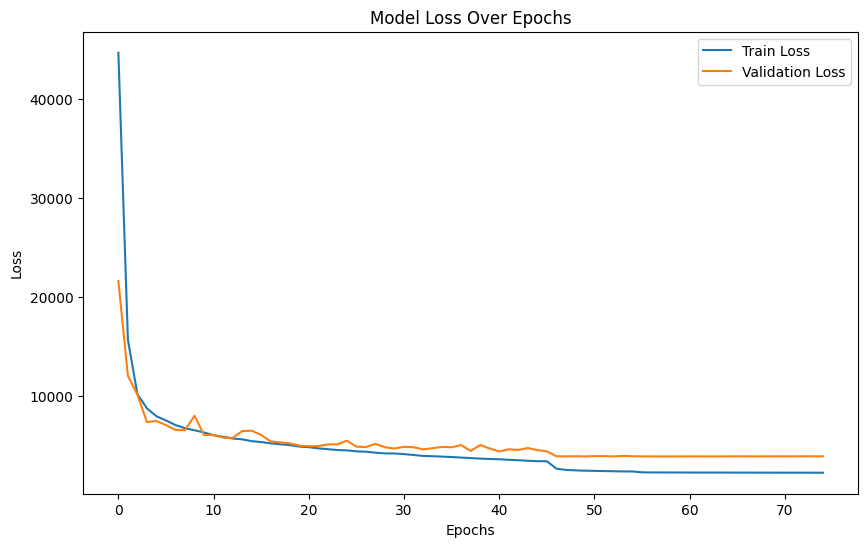

In [ ]:
# Plot loss during training (we can do this because we saved a "history" during training)
from matplotlib import pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Filter the original data for November and December
nov_dec_indices = bikes[(bikes['month'] == 11) | (bikes['month'] == 12)].index

# Get indices for November and December in the test and validation sets
nov_dec_val_indices = [i for i in range(len(X_val)) if i in nov_dec_indices]
nov_dec_test_indices = [i for i in range(len(X_test)) if i in nov_dec_indices]

# Filter validation and test sets for November and December
X_val_nov_dec = X_val[nov_dec_val_indices]
y_val_nov_dec = y_val.iloc[nov_dec_val_indices]
y_pred_val_nov_dec = y_pred_val[nov_dec_val_indices]

X_test_nov_dec = X_test[nov_dec_test_indices]
y_test_nov_dec = y_test.iloc[nov_dec_test_indices]
y_pred_test_nov_dec = y_pred_test[nov_dec_test_indices]

# Calculate metrics for November and December validation and test sets
val_mae_nov_dec = mean_absolute_error(y_val_nov_dec, y_pred_val_nov_dec)
test_mae_nov_dec = mean_absolute_error(y_test_nov_dec, y_pred_test_nov_dec)
val_mse_nov_dec = mean_squared_error(y_val_nov_dec, y_pred_val_nov_dec)
test_mse_nov_dec = mean_squared_error(y_test_nov_dec, y_pred_test_nov_dec)
val_r2_nov_dec = r2_score(y_val_nov_dec, y_pred_val_nov_dec)
test_r2_nov_dec = r2_score(y_test_nov_dec, y_pred_test_nov_dec)

print(f"November and December Validation MAE: {val_mae_nov_dec}")
print(f"November and December Test MAE: {test_mae_nov_dec}")
print(f"November and December Validation MSE: {val_mse_nov_dec}")
print(f"November and December Test MSE: {test_mse_nov_dec}")
print(f"November and December Validation R^2: {val_r2_nov_dec}")
print(f"November and December Test R^2: {test_r2_nov_dec}")

November and December Validation MAE: 36.72480442940863
November and December Test MAE: 35.10034235790779
November and December Validation MSE: 4071.091884313949
November and December Test MSE: 3612.3688056510887
November and December Validation R^2: 0.9638247393043894
November and December Test R^2: 0.9667698426473983


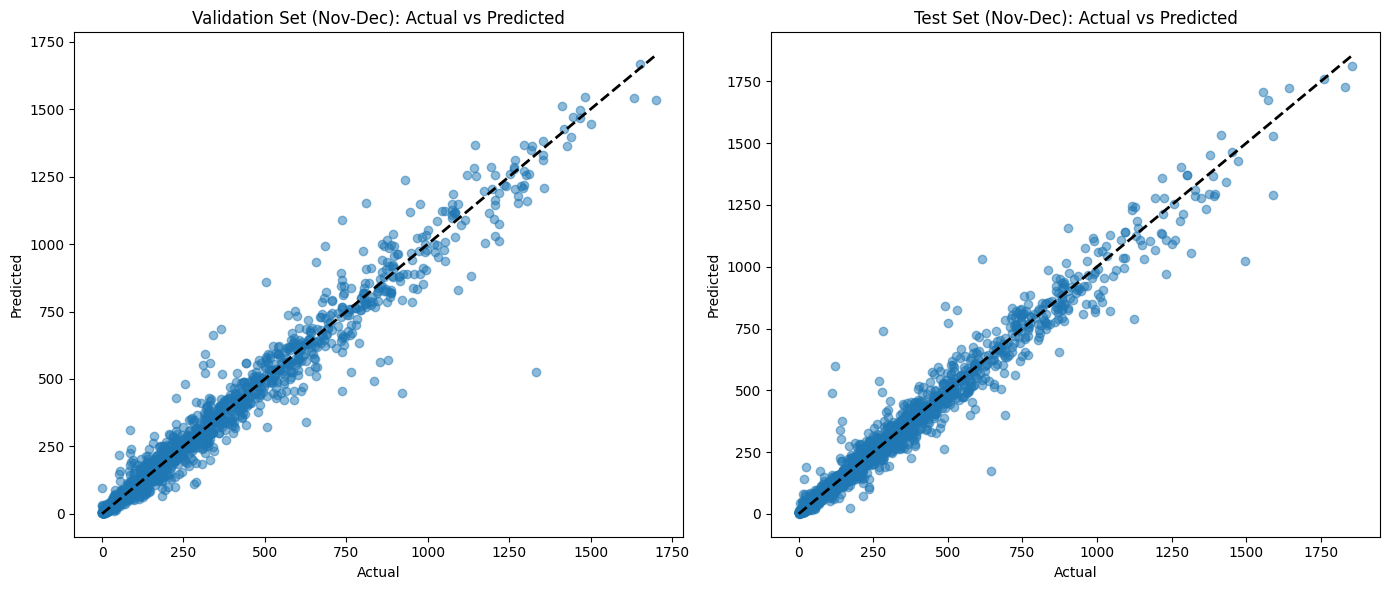

In [ ]:
# Plot the actual vs predicted for November and December
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_val_nov_dec, y_pred_val_nov_dec, alpha=0.5)
plt.plot([y_val_nov_dec.min(), y_val_nov_dec.max()], [y_val_nov_dec.min(), y_val_nov_dec.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Validation Set (Nov-Dec): Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test_nov_dec, y_pred_test_nov_dec, alpha=0.5)
plt.plot([y_test_nov_dec.min(), y_test_nov_dec.max()], [y_test_nov_dec.min(), y_test_nov_dec.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set (Nov-Dec): Actual vs Predicted')

plt.tight_layout()
plt.show()